In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)






Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Aashna Vaid\anaconda\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
C:\Users\Aashna Vaid\anaconda\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
C:\Users\Aashna Vaid\anaconda\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`


Instructions for updating:
Use tf.cast instead.


C:\Users\Aashna Vaid\anaconda\lib\site-packages\ipykernel_launcher.py:62: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 367us/step - loss: 0.8454 - accuracy: 0.5251 - val_loss: 0.5401 - val_accuracy: 0.7675
Epoch 2/100
5359/5359 [==============================] - 2s 314us/step - loss: 0.5016 - accuracy: 0.7897 - val_loss: 0.4918 - val_accuracy: 0.7940
Epoch 3/100
5359/5359 [==============================] - 2s 301us/step - loss: 0.4663 - accuracy: 0.8003 - val_loss: 0.4661 - val_accuracy: 0.8001
Epoch 4/100
5359/5359 [==============================] - 1s 258us/step - loss: 0.4398 - accuracy: 0.8056 - val_loss: 0.4441 - val_accuracy: 0.8016
Epoch 5/100
5359/5359 [==============================] - 1s 253us/step - loss: 0.4159 - accuracy: 0.8123 - val_loss: 0.4249 - val_accuracy: 0.8141
Epoch 6/100
5359/5359 [==============================] - 2s 281us/step - loss: 0.3957 - accuracy: 0.8285 - val_loss: 0.4093 - val_accuracy: 0.8183
Epoch 7/100
5359/5359 [==============================] - 1s 252us/step

5359/5359 [==============================] - 1s 227us/step - loss: 0.3324 - accuracy: 0.8651 - val_loss: 0.3631 - val_accuracy: 0.8527
Epoch 57/100
5359/5359 [==============================] - 1s 198us/step - loss: 0.3323 - accuracy: 0.8670 - val_loss: 0.3633 - val_accuracy: 0.8527
Epoch 58/100
5359/5359 [==============================] - 1s 226us/step - loss: 0.3318 - accuracy: 0.8655 - val_loss: 0.3631 - val_accuracy: 0.8516
Epoch 59/100
5359/5359 [==============================] - 1s 223us/step - loss: 0.3316 - accuracy: 0.8647 - val_loss: 0.3626 - val_accuracy: 0.8527
Epoch 60/100
5359/5359 [==============================] - 1s 230us/step - loss: 0.3311 - accuracy: 0.8660 - val_loss: 0.3624 - val_accuracy: 0.8523
Epoch 61/100
5359/5359 [==============================] - 1s 225us/step - loss: 0.3310 - accuracy: 0.8673 - val_loss: 0.3623 - val_accuracy: 0.8546
Epoch 62/100
5359/5359 [==============================] - 1s 240us/step - loss: 0.3308 - accuracy: 0.8662 - val_loss: 0.3627 

KeyError: 'acc'

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')


In [ ]:
dataset.head()

In [ ]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [15]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [16]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [17]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [20]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

C:\Users\Aashna Vaid\anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  """
C:\Users\Aashna Vaid\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
C:\Users\Aashna Vaid\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Aashna Vaid\anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 499us/step - loss: 0.5357 - accuracy: 0.7393 - val_loss: 0.4753 - val_accuracy: 0.7910
Epoch 2/100
5359/5359 [==============================] - 3s 476us/step - loss: 0.4620 - accuracy: 0.7960 - val_loss: 0.4522 - val_accuracy: 0.7948
Epoch 3/100
5359/5359 [==============================] - 2s 335us/step - loss: 0.4447 - accuracy: 0.7977 - val_loss: 0.4379 - val_accuracy: 0.7963
Epoch 4/100
5359/5359 [==============================] - 2s 403us/step - loss: 0.4317 - accuracy: 0.8011 - val_loss: 0.4279 - val_accuracy: 0.8001
Epoch 5/100
5359/5359 [==============================] - 3s 495us/step - loss: 0.4222 - accuracy: 0.8093 - val_loss: 0.4210 - val_accuracy: 0.8152
Epoch 6/100
5359/5359 [==============================] - 2s 391us/step - loss: 0.4147 - accuracy: 0.8203 - val_loss: 0.4147 - val_accuracy: 0.8201
Epoch 7/100
5359/5359 [==============================] - 2s 370us/step

In [21]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


KeyError: 'acc'

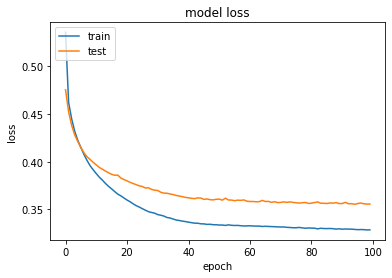

In [22]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [23]:
cm

array([[1528,   67],
       [ 207,  198]], dtype=int64)